In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
s='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print("URL:",s)

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [9]:
df = pd.read_csv(s, header=None, encoding='utf-8')
df


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
X=df.iloc[0:100, [0,2]].values

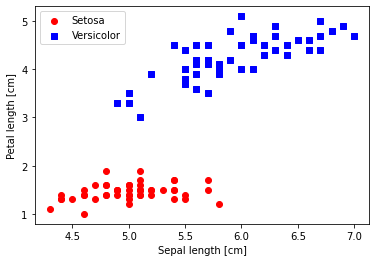

In [12]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue',
            marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()


In [13]:
class Perceptron:
    def __init__(self,lr=0.01,n_iter=50,random_state=42):
        self.lr=lr
        self.n_iter=n_iter
        self.random_state=random_state

    def fit(self,X,y):
        rgen=np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0,scale=0.01,size=X.shape[1])
        self.b_=np.float64(0.0)
        self.errors_=[]

        for _ in range(self.n_iter):
            errors=0
            for xi,target in zip(X,y):
                update=self.lr*(target-self.predict(xi))
                self.w_+=update*xi
                self.b_+=update
                errors+=int(update!=0.0)
            self.errors_.append(errors)
        return self

    def net_input (self,X):
        return np.dot(X,self.w_)+self.b_

    def predict(self,X):
        return np.where(self.net_input(X)>=0.0,1,0)    

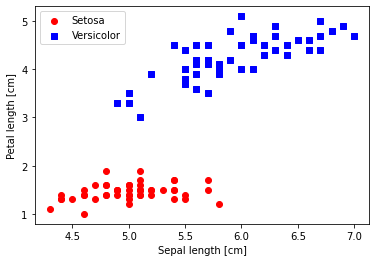

In [14]:
plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='Setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='s',label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [15]:
np.unique(y)

array([0, 1])

In [16]:
X[:,0].min()-1

3.3

In [17]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,resolution=0.02):
    markers=('o','s','^','v','<')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])

    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1

    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                        np.arange(x2_min,x2_max,resolution))
    print(xx1)
    print(xx2)                     
    lab=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    lab=lab.reshape(xx1.shape)
    plt.contourf(xx1,xx2,lab,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=1, c=colors[idx],
                marker=markers[idx], label=f'Class {cl}', edgecolor='black')



In [18]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

NameError: name 'ppn' is not defined